In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.25M/1.25M [00:00<00:00, 75.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1


Path to dataset files: /root/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1


<ipython-input-8-ca93f3ff6817>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total Charges'] = pd.to_numeric(df_filtered['Total Charges'], errors='coerce')
<ipython-input-8-ca93f3ff6817>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-8-ca93f3ff6817>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

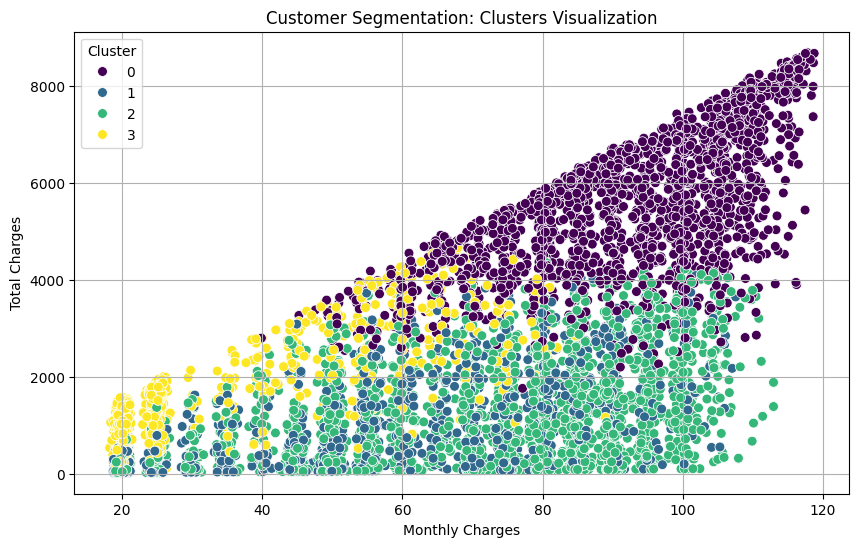

In [8]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")
print("Path to dataset files:", path)

# Load dataset
dataset_file = f"{path}/Telco_customer_churn.xlsx"
df = pd.read_excel(dataset_file)

# Adjusted column names based on dataset
columns_of_interest = ['Monthly Charges', 'Total Charges', 'Tenure Months', 'Contract', 'Payment Method', 'Paperless Billing']
df_filtered = df[columns_of_interest]

# Convert Total Charges to numeric and handle NaN
df_filtered['Total Charges'] = pd.to_numeric(df_filtered['Total Charges'], errors='coerce')
df_cleaned = df_filtered.dropna()

# Encode categorical variables
label_encoders = {}
for col in ['Contract', 'Payment Method', 'Paperless Billing']:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Scale features
features = ['Monthly Charges', 'Total Charges', 'Tenure Months', 'Contract', 'Payment Method', 'Paperless Billing']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])

# Apply K-Means clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cleaned['Monthly Charges'],
    y=df_cleaned['Total Charges'],
    hue=df_cleaned['Cluster'],
    palette='viridis',
    s=50
)
plt.title('Customer Segmentation: Clusters Visualization')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


Path to dataset files: /root/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1


<ipython-input-9-641806f977b7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total Charges'] = pd.to_numeric(df_filtered['Total Charges'], errors='coerce')


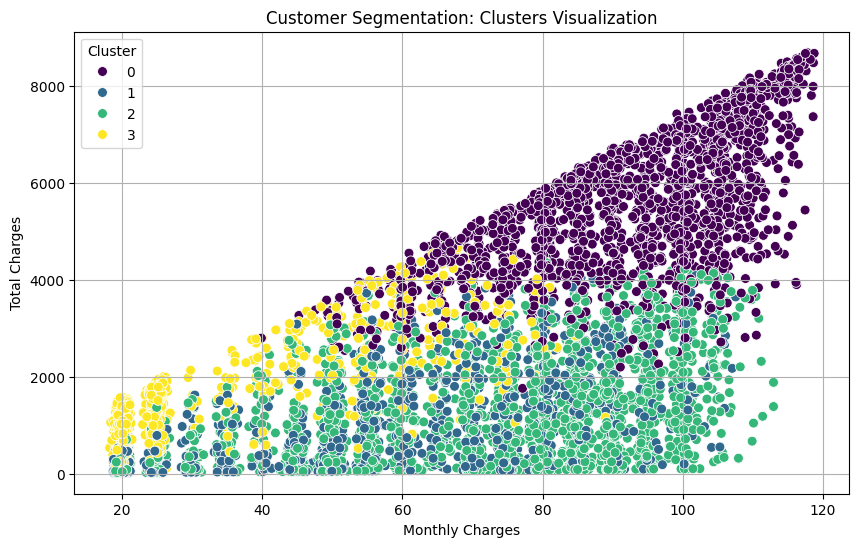

In [9]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")
print("Path to dataset files:", path)

# Load dataset
dataset_file = f"{path}/Telco_customer_churn.xlsx"
df = pd.read_excel(dataset_file)

# Adjusted column names based on dataset
columns_of_interest = ['Monthly Charges', 'Total Charges', 'Tenure Months', 'Contract', 'Payment Method', 'Paperless Billing']
df_filtered = df[columns_of_interest]

# Convert Total Charges to numeric and handle NaN
df_filtered['Total Charges'] = pd.to_numeric(df_filtered['Total Charges'], errors='coerce')
df_filtered = df_filtered.dropna().copy()  # Use `.copy()` to avoid SettingWithCopyWarning

# Encode categorical variables
label_encoders = {}
for col in ['Contract', 'Payment Method', 'Paperless Billing']:
    le = LabelEncoder()
    df_filtered[col] = le.fit_transform(df_filtered[col])
    label_encoders[col] = le

# Scale features
features = ['Monthly Charges', 'Total Charges', 'Tenure Months', 'Contract', 'Payment Method', 'Paperless Billing']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])

# Apply K-Means clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_filtered['Monthly Charges'],
    y=df_filtered['Total Charges'],
    hue=df_filtered['Cluster'],
    palette='viridis',
    s=50
)
plt.title('Customer Segmentation: Clusters Visualization')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()
